# Решение задач методом Монте-Карло

## Задача 1. Парадокс Монти Холла
## Задача 2. Стратегии игры в казино


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline


## Задача 1. Парадокс Монти Холла

**Формулировка:**
Выбираем одну из трёх дверей. За одной дверью автомобиль, за двумя другими — козы.
Ведущий открывает одну из оставшихся дверей с козой и предлагает изменить выбор.

**Вопрос:** Какая стратегия лучше — изменить выбор или не менять?


In [ ]:
# Задаем зерно датчика для воспроизводимости результатов
random.seed(a=42, version=2)
np.random.seed(42)

n_exp = 1000000

wins_no_switch = 0  
wins_switch = 0     

for i in range(n_exp):
    car_door = random.randint(0, 2)

    player_choice = random.randint(0, 2)

    available_doors = [0, 1, 2]
    available_doors.remove(player_choice)  #
    if car_door in available_doors:
        available_doors.remove(car_door)  
    opened_door = random.choice(available_doors)
    
    # Стратегия 1: Не менять выбор
    if player_choice == car_door:
        wins_no_switch += 1
    
    # Стратегия 2: Изменить выбор
    # Находим дверь, на которую игрок переключится
    remaining_doors = [0, 1, 2]
    remaining_doors.remove(player_choice)  # Убираем первоначальный выбор
    remaining_doors.remove(opened_door)     # Убираем открытую ведущим
    new_choice = remaining_doors[0]  # Остается только одна дверь
    
    if new_choice == car_door:
        wins_switch += 1

# Вычисляем вероятности
prob_no_switch = wins_no_switch / n_exp
prob_switch = wins_switch / n_exp

print(f"Количество экспериментов: {n_exp}")
print(f"\nСтратегия 'НЕ МЕНЯТЬ выбор':")
print(f"  Количество выигрышей: {wins_no_switch}")
print(f"  Вероятность выигрыша: {prob_no_switch:.6f} ({prob_no_switch*100:.2f}%)")
print(f"  Теоретическая вероятность: {1/3:.6f} ({1/3*100:.2f}%)")
print(f"  Отклонение: {abs(prob_no_switch - 1/3):.6f}")

print(f"\nСтратегия 'ИЗМЕНИТЬ выбор':")
print(f"  Количество выигрышей: {wins_switch}")
print(f"  Вероятность выигрыша: {prob_switch:.6f} ({prob_switch*100:.2f}%)")
print(f"  Теоретическая вероятность: {2/3:.6f} ({2/3*100:.2f}%)")
print(f"  Отклонение: {abs(prob_switch - 2/3):.6f}")

print(f"\nВывод: Стратегия 'ИЗМЕНИТЬ выбор' дает вероятность выигрыша в {prob_switch/prob_no_switch:.2f} раз выше!")


Количество экспериментов: 100000

Стратегия 'НЕ МЕНЯТЬ выбор':
  Количество выигрышей: 33252
  Вероятность выигрыша: 0.332520 (33.25%)
  Теоретическая вероятность: 0.333333 (33.33%)
  Отклонение: 0.000813

Стратегия 'ИЗМЕНИТЬ выбор':
  Количество выигрышей: 66748
  Вероятность выигрыша: 0.667480 (66.75%)
  Теоретическая вероятность: 0.666667 (66.67%)
  Отклонение: 0.000813

Вывод: Стратегия 'ИЗМЕНИТЬ выбор' дает вероятность выигрыша в 2.01 раз выше!


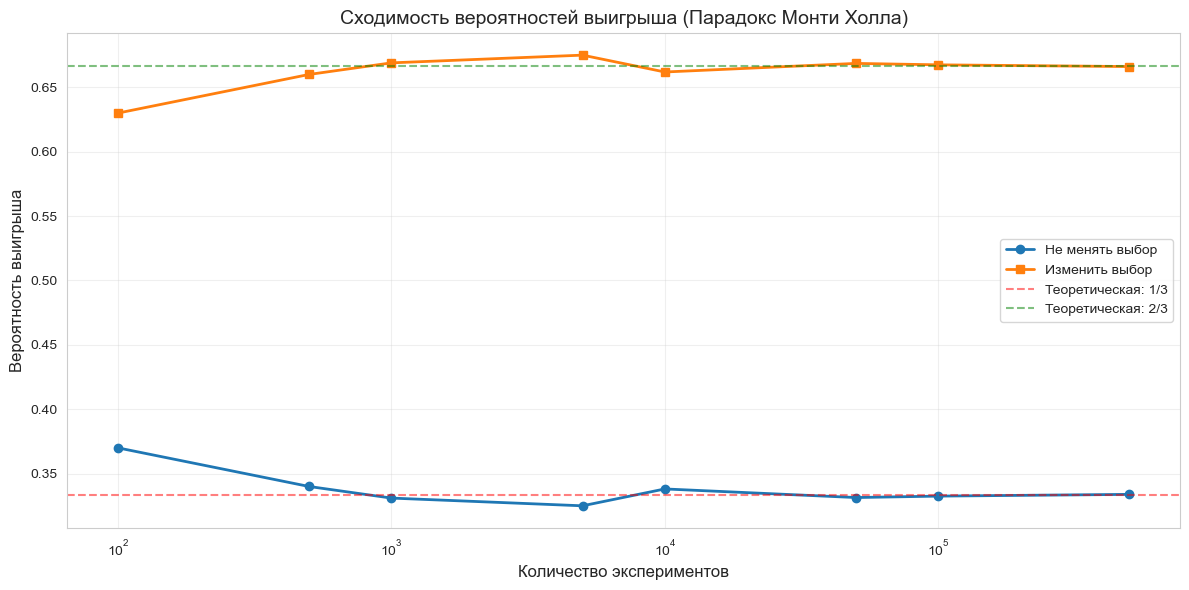

In [ ]:
# Визуализация сходимости вероятностей при увеличении числа экспериментов
n_exp_list = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
prob_no_switch_list = []
prob_switch_list = []

random.seed(a=42, version=2)
np.random.seed(42)

for n_exp in n_exp_list:
    wins_no_switch = 0
    wins_switch = 0
    
    for i in range(n_exp):
        car_door = random.randint(0, 2)
        player_choice = random.randint(0, 2)
        
        available_doors = [0, 1, 2]
        available_doors.remove(player_choice)
        if car_door in available_doors:
            available_doors.remove(car_door)
        opened_door = random.choice(available_doors)
        
        if player_choice == car_door:
            wins_no_switch += 1
        
        remaining_doors = [0, 1, 2]
        remaining_doors.remove(player_choice)
        remaining_doors.remove(opened_door)
        new_choice = remaining_doors[0]
        
        if new_choice == car_door:
            wins_switch += 1
    
    prob_no_switch_list.append(wins_no_switch / n_exp)
    prob_switch_list.append(wins_switch / n_exp)

plt.figure(figsize=(12, 6))
plt.plot(n_exp_list, prob_no_switch_list, 'o-', label="Не менять выбор", linewidth=2)
plt.plot(n_exp_list, prob_switch_list, 's-', label="Изменить выбор", linewidth=2)
plt.axhline(y=1/3, color='r', linestyle='--', alpha=0.5, label='Теоретическая: 1/3')
plt.axhline(y=2/3, color='g', linestyle='--', alpha=0.5, label='Теоретическая: 2/3')
plt.xlabel('Количество экспериментов', fontsize=12)
plt.ylabel('Вероятность выигрыша', fontsize=12)
plt.title('Сходимость вероятностей выигрыша (Парадокс Монти Холла)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.tight_layout()
plt.show()


## Задача 2. Стратегии игры в казино

**Формулировка:**
Есть 1000 рублей. Нужно выиграть еще 1000 рублей.
Вероятность выигрыша в одной игре: $\frac{18}{37}$

**Две стратегии:**
- а) Один раз ставим 1000 рублей
- б) Делаем ставки по одному рублю, пока не выиграем 1000 рублей или не проиграем все деньги

**Вопрос:** При какой стратегии вероятность выигрыша выше?


In [ ]:
# Параметры задачи
INITIAL_CAPITAL = 1000  
TARGET_WIN = 1000      
WIN_PROB = 18/37      
LOSS_PROB = 1 - WIN_PROB  



Параметры:
  Начальный капитал: 1000 рублей
  Целевой капитал: 2000 рублей
  Вероятность выигрыша: 0.486486 (48.65%)
  Вероятность проигрыша: 0.513514 (51.35%)


### Стратегия а) all in


In [ ]:
random.seed(a=12345, version=2)
np.random.seed(12345)

n_exp = 100000
wins_strategy_a = 0

for i in range(n_exp):

    if np.random.random() < WIN_PROB:
        wins_strategy_a += 1

prob_strategy_a = wins_strategy_a / n_exp
theoretical_prob_a = WIN_PROB


print(f"  Вероятность выигрыша (Монте-Карло): {prob_strategy_a:.6f} ({prob_strategy_a*100:.2f}%)")
print(f"  Теоретическая вероятность: {theoretical_prob_a:.6f} ({theoretical_prob_a*100:.2f}%)")


Стратегия а) Один раз ставим 1000 рублей:
  Количество экспериментов: 100000
  Количество выигрышей: 48581
  Вероятность выигрыша (Монте-Карло): 0.485810 (48.58%)
  Теоретическая вероятность: 0.486486 (48.65%)
  Отклонение: 0.000676


### Стратегия б) Ставки по одному рублю до выигрыша 1000 рублей или проигрыша всего капитала


In [ ]:
random.seed(a=12345, version=2)
np.random.seed(12345)
n_exp = 100000  
wins_strategy_b = 0
total_games = []  

for i in range(n_exp):
    capital = INITIAL_CAPITAL  # Начальный капитал
    target = INITIAL_CAPITAL + TARGET_WIN  
    games_played = 0 
    
    # Играем до достижения цели или разорения
    while capital > 0 and capital < target:
        games_played += 1
        if np.random.random() < WIN_PROB:
            capital += 1
        else:
            capital -= 1
    
    if capital >= target:
        wins_strategy_b += 1
    
    total_games.append(games_played)
    
    if (i + 1) % 1000 == 0:
        print(f"  Проведено экспериментов: {i + 1}/{n_exp}, выигрышей: {wins_strategy_b}")

prob_strategy_b = wins_strategy_b / n_exp
avg_games = np.mean(total_games)

q_over_p = LOSS_PROB / WIN_PROB  
theoretical_prob_b = (1 - q_over_p**INITIAL_CAPITAL) / (1 - q_over_p**(INITIAL_CAPITAL + TARGET_WIN))

print(f"\nСтратегия б) Ставки по 1 рублю:")
print(f"  Количество экспериментов: {n_exp}")
print(f"  Количество выигрышей: {wins_strategy_b}")
print(f"  Вероятность выигрыша (Монте-Карло): {prob_strategy_b:.6f} ({prob_strategy_b*100:.2f}%)")
print(f"  Теоретическая вероятность: {theoretical_prob_b:.10e} ({theoretical_prob_b*100:.2e}%)")
print(f"  Среднее количество игр до окончания: {avg_games:.1f}")


  Проведено экспериментов: 1000/10000, выигрышей: 0
  Проведено экспериментов: 2000/10000, выигрышей: 0
  Проведено экспериментов: 3000/10000, выигрышей: 0
  Проведено экспериментов: 4000/10000, выигрышей: 0
  Проведено экспериментов: 5000/10000, выигрышей: 0
  Проведено экспериментов: 6000/10000, выигрышей: 0
  Проведено экспериментов: 7000/10000, выигрышей: 0
  Проведено экспериментов: 8000/10000, выигрышей: 0
  Проведено экспериментов: 9000/10000, выигрышей: 0
  Проведено экспериментов: 10000/10000, выигрышей: 0

Стратегия б) Ставки по 1 рублю:
  Количество экспериментов: 10000
  Количество выигрышей: 0
  Вероятность выигрыша (Монте-Карло): 0.000000 (0.00%)
  Теоретическая вероятность: 3.3029663597e-24 (3.30e-22%)
  Среднее количество игр до окончания: 37069.9


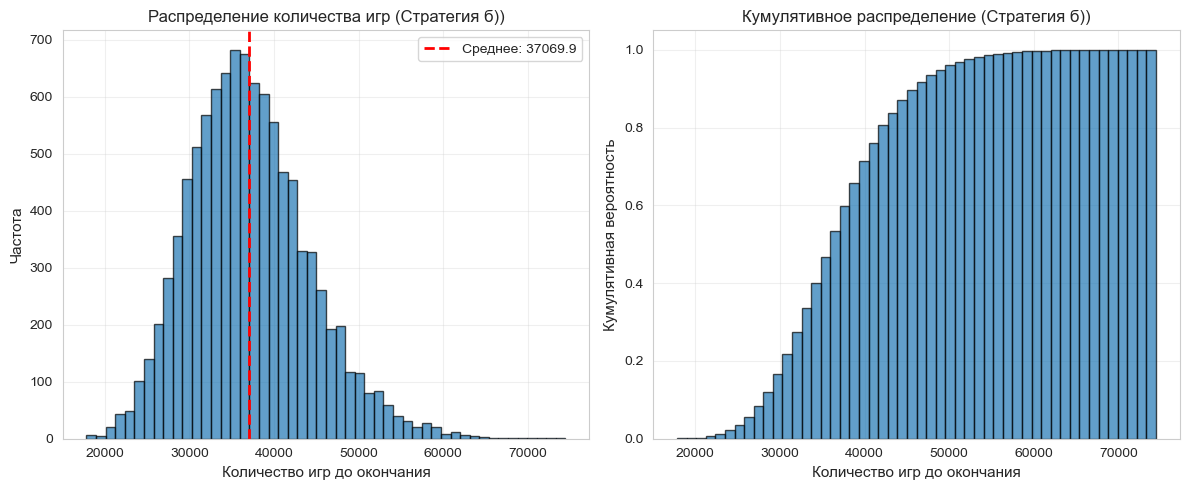

In [ ]:
# Визуализация: распределение количества игр для стратегии б)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(total_games, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Количество игр до окончания', fontsize=11)
plt.ylabel('Частота', fontsize=11)
plt.title('Распределение количества игр (Стратегия б))', fontsize=12)
plt.axvline(avg_games, color='r', linestyle='--', linewidth=2, label=f'Среднее: {avg_games:.1f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(total_games, bins=50, edgecolor='black', alpha=0.7, cumulative=True, density=True)
plt.xlabel('Количество игр до окончания', fontsize=11)
plt.ylabel('Кумулятивная вероятность', fontsize=11)
plt.title('Кумулятивное распределение (Стратегия б))', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


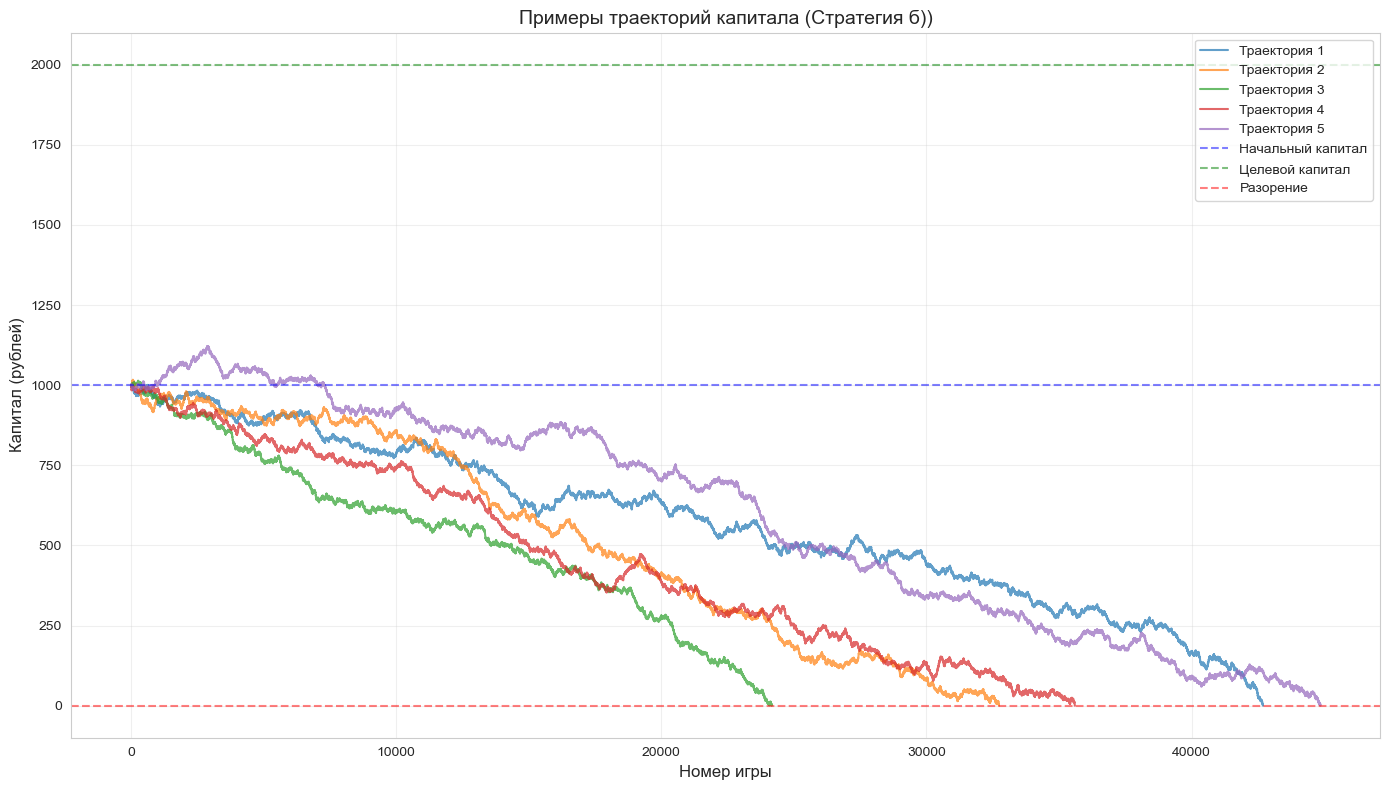

In [ ]:
random.seed(a=999, version=2)
np.random.seed(999)

n_trajectories = 5
max_games = 50000 

plt.figure(figsize=(14, 8))

for traj_num in range(n_trajectories):
    capital = INITIAL_CAPITAL
    target = INITIAL_CAPITAL + TARGET_WIN
    capital_history = [capital]
    games = 0
    
    while capital > 0 and capital < target and games < max_games:
        games += 1
        if np.random.random() < WIN_PROB:
            capital += 1
        else:
            capital -= 1
        capital_history.append(capital)
    
    plt.plot(capital_history, alpha=0.7, linewidth=1.5, label=f'Траектория {traj_num+1}')

plt.axhline(y=INITIAL_CAPITAL, color='b', linestyle='--', alpha=0.5, label='Начальный капитал')
plt.axhline(y=INITIAL_CAPITAL + TARGET_WIN, color='g', linestyle='--', alpha=0.5, label='Целевой капитал')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Разорение')
plt.xlabel('Номер игры', fontsize=12)
plt.ylabel('Капитал (рублей)', fontsize=12)
plt.title('Примеры траекторий капитала (Стратегия б))', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
